                  Country  id           gdp          pop     foodwaste  \
2                  Angola   2  1.030423e+11  25096150.00  2.182667e+06   
3                 Albania   3  1.347108e+10   2880703.00  5.874835e+05   
5    United Arab Emirates   0  3.842225e+11   9269612.00  2.111247e+06   
6               Argentina   0  4.475178e+11  42981515.00  6.938547e+06   
7                 Armenia   3  1.150200e+10   2906220.00  2.808960e+05   
..                    ...  ..           ...          ...           ...   
202               Uruguay   0  4.836293e+10   3431552.00  6.741746e+05   
204            Uzbekistan   2  6.246909e+10  29774500.00  1.600000e+06   
211                 Samoa   3  7.380417e+08    187665.00  1.167201e+04   
214          South Africa   3  4.212087e+11  51729345.36  3.023600e+06   
216              Zimbabwe   1  1.481899e+10  12500525.00  5.219107e+05   

                       Region  Population (millions)   HDI GDP per Capita  \
2                      Africa     

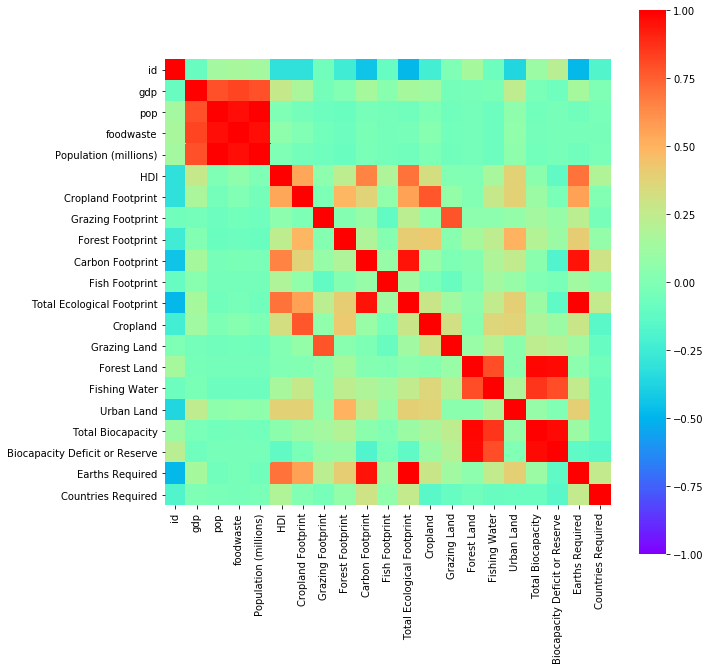

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

data = pd.read_csv (r'C:/Users/enoch/Desktop/Earth/country_level_data_0.csv')
footprints = pd.read_csv (r'C:/Users/enoch/Desktop/Earth/904.csv')

#print(data.columns)
usefuldata = data[['country_name','income_id','gdp','composition_food_organic_waste_percent','population_population_number_of_people','total_msw_total_msw_generated_tons_year']]
#print (usefuldata)
foodwaste = data['total_msw_total_msw_generated_tons_year'] * data['composition_food_organic_waste_percent']/100
usefuldata['total_msw_total_msw_generated_tons_year'].count()
df=usefuldata.join(pd.DataFrame({'foodwaste':foodwaste}))
df=df.rename(columns={"income_id": "id", "country_name": "Country","population_population_number_of_people":"pop"})
df=df.drop(columns=['total_msw_total_msw_generated_tons_year','composition_food_organic_waste_percent'])

#change income classification to number
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df["id"])
df["id"]=le.transform(df["id"]) 

df=df.merge(footprints, on='Country', how='left')


df=df.dropna()
print(df)

#Some Regressing
y= df['foodwaste']
features = ['pop','gdp','id','HDI']
X = df[features]
X.describe()
# split data into training and validation data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)
# Define model
model = DecisionTreeRegressor()
# Fit model
model.fit(train_X, train_y)
# get predicted prices on validation data
val_predictions = model.predict(val_X)
print("Mean percent error:")
print(mean_absolute_error(val_y, val_predictions)/df['foodwaste'].mean())
#plt.scatter(y=val_y,x=val_predictions)
#plt.xlabel("Predictions")
#plt.ylabel("Actual")
#print(df.corr())
corr=df.corr()
mask = np.zeros(corr.shape, dtype=bool)
plt.figure(figsize=(10,10))

thing = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap='rainbow',
    square=True,
    
)